In [3]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import mode
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Training.csv')
df_test = pd.read_csv('Testing.csv')

In [3]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
#getting rid of unnamed column
df_train.drop(columns = 'Unnamed: 133', inplace = True)

#first 3 rows
df_train.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
df_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
df_test.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [9]:
df_train['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [10]:
le = LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [11]:
df_train['prognosis'].max()
#41 different type of disease

40

In [12]:
df_test['prognosis'] = le.transform(df_test['prognosis'])
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14


In [13]:
le.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [14]:
#Every column is training except prognosis
x_train = df_train.drop(columns = ['prognosis'])
y_train = df_train['prognosis']

In [15]:
x_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train.head()

0    15
1    15
2    15
3    15
4    15
Name: prognosis, dtype: int32

In [17]:
x_test = df_test.drop(columns = ['prognosis'])
y_test = df_test['prognosis']

In [18]:
#y_train first row before one hot encoding
print(y_train[:1])

#y_train is a number - one hot encode it to train the data
y_train = keras.utils.to_categorical(y_train, num_classes = 41)

#y_train first row after one hot encoding
print(y_train[:1])

0    15
Name: prognosis, dtype: int32
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
#2 hidden layers with 32 units
#randomly dropping 25% of data to prevent overfitting
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_shape = (x_train.shape[-1], )))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 41, activation = 'softmax'))

C:\Users\Ekanshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           4,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 41)                  │           1,353 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,721 (30.16 KB)

 Trainable params: 7,721 (30.16 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#training model
#epochs- how many times yout want to pass this dataset throught the model
model.fit(x_train, y_train, batch_size = 1000, epochs = 50, verbose = 2)

Epoch 1/50
5/5 - 4s - 855ms/step - accuracy: 0.0248 - loss: 3.7110
Epoch 2/50
5/5 - 0s - 37ms/step - accuracy: 0.0360 - loss: 3.6734
Epoch 3/50
5/5 - 0s - 35ms/step - accuracy: 0.0498 - loss: 3.6348
Epoch 4/50
5/5 - 0s - 78ms/step - accuracy: 0.0638 - loss: 3.5959
Epoch 5/50
5/5 - 0s - 62ms/step - accuracy: 0.0904 - loss: 3.5496
Epoch 6/50
5/5 - 0s - 33ms/step - accuracy: 0.1106 - loss: 3.4891
Epoch 7/50
5/5 - 0s - 80ms/step - accuracy: 0.1266 - loss: 3.4295
Epoch 8/50
5/5 - 0s - 86ms/step - accuracy: 0.1439 - loss: 3.3466
Epoch 9/50
5/5 - 0s - 66ms/step - accuracy: 0.1699 - loss: 3.2562
Epoch 10/50
5/5 - 0s - 67ms/step - accuracy: 0.1963 - loss: 3.1513
Epoch 11/50
5/5 - 0s - 32ms/step - accuracy: 0.2217 - loss: 3.0205
Epoch 12/50
5/5 - 0s - 34ms/step - accuracy: 0.2575 - loss: 2.8830
Epoch 13/50
5/5 - 0s - 33ms/step - accuracy: 0.2941 - loss: 2.7376
Epoch 14/50
5/5 - 0s - 35ms/step - accuracy: 0.3238 - loss: 2.6003
Epoch 15/50
5/5 - 0s - 31ms/step - accuracy: 0.3555 - loss: 2.4537
Epo

In [22]:
prediction = model.predict(x_test)
print(prediction[:1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
[[9.59095473e-07 1.43421069e-03 3.47957877e-03 3.32697564e-05
  8.14061877e-06 8.29349924e-03 7.94582942e-04 1.62935175e-05
  1.35506643e-03 1.01174395e-04 1.81837204e-05 3.69933423e-06
  7.12034137e-07 5.20031390e-05 1.69029098e-03 9.71266925e-01
  9.38308403e-06 7.95280084e-06 1.56687020e-06 1.52411242e-03
  1.46009101e-04 1.72526015e-05 1.87059166e-04 1.39005249e-04
  4.04248458e-05 8.81652431e-06 5.74932760e-03 4.96349776e-06
  9.51876864e-05 2.45430001e-05 3.42424755e-05 1.32579810e-03
  5.53563996e-06 4.30200743e-07 5.81835739e-05 8.48401851e-06
  7.91491175e-07 4.32480992e-05 1.95296179e-03 6.13412121e-05
  4.75477555e-06]]


if the output of the prediction of training is same as output of the testing dataset - model is working

In [23]:
#find the index of the maximum number from above cell output and convert that to number
prediction = np.argmax(prediction, axis = -1)
print(prediction[:5])

[15  4 16  9 14]


In [24]:
print(y_test[:5])

0    15
1     4
2    16
3     9
4    14
Name: prognosis, dtype: int32


In [25]:
print(accuracy_score(y_test, prediction))

0.9761904761904762


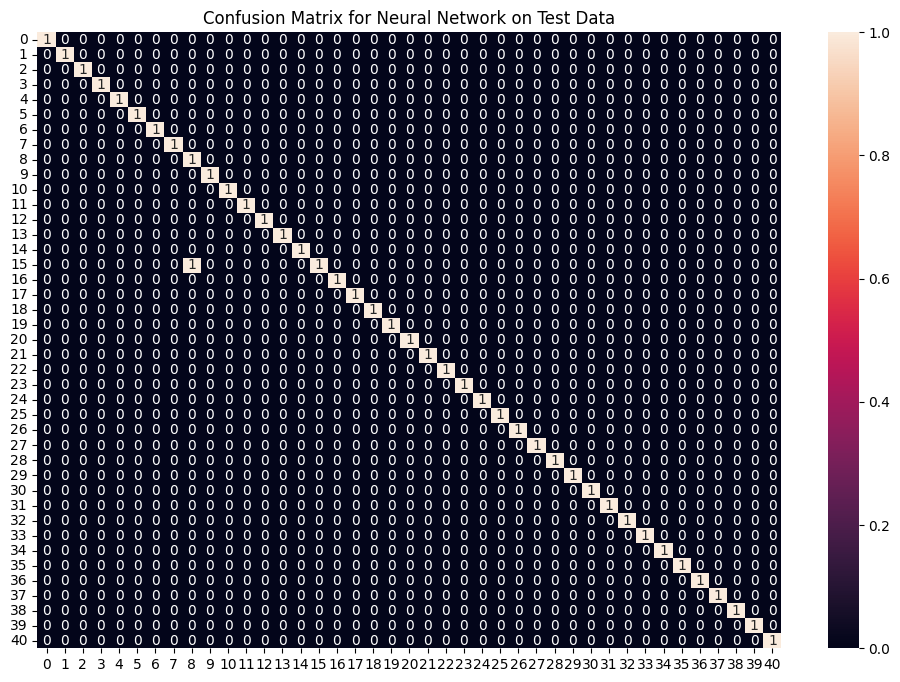

In [26]:
cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Neural Network on Test Data")
plt.show()

In [29]:
symptom_columns = df_train.columns[:-1]  # All columns except 'prognosis'

# Function to predict disease based on symptoms
def predict_disease(symptoms):
    """
    Predicts the disease based on the input symptoms using a pre-trained model.
    
    Args:
        symptoms (list): List of symptoms provided by the user.
    
    Returns:
        str: Predicted disease name.
    """
    # Create an input vector initialized to 0 for all symptoms
    input_vector = np.zeros(len(symptom_columns))
    
    # Set indices corresponding to the given symptoms to 1
    for symptom in symptoms:
        if symptom in symptom_columns:
            input_vector[symptom_columns.get_loc(symptom)] = 1
        else:
            print(f"Warning: {symptom} is not a recognized symptom.")
    
    # Reshape input to match model's input shape
    input_vector = input_vector.reshape(1, -1)
    
    # Predict disease probabilities
    prediction = model.predict(input_vector)
    
    # Get the index of the highest probability
    predicted_class = np.argmax(prediction, axis=-1)
    
    # Map the index back to the disease name
    disease = le.inverse_transform(predicted_class)
    return disease[0]

# User Input
print("Enter your symptoms separated by commas (e.g., headache, fever, cough):")
user_input = input("Your symptoms: ").lower().split(',')

# Clean and standardize user input
user_symptoms = [symptom.strip() for symptom in user_input]

# Predict the disease based on symptoms
predicted_disease = predict_disease(user_symptoms)

# Output the result
print(f"\nBased on the symptoms provided, you may have: {predicted_disease}")

Enter your symptoms separated by commas (e.g., headache, fever, cough):


Your symptoms:  vomiting, diarrhoea


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Based on the symptoms provided, you may have: Gastroenteritis
